# Using several algorithms on a dumy set

In [5]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

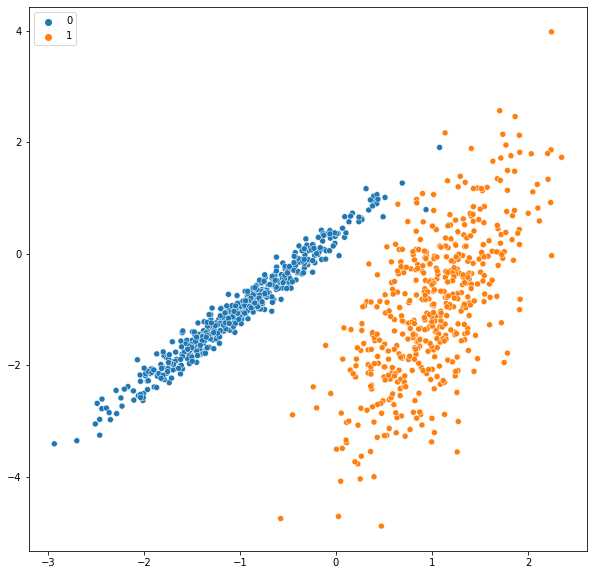

In [8]:
# create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

### Affinity propagation clustering

In [9]:
from sklearn import cluster

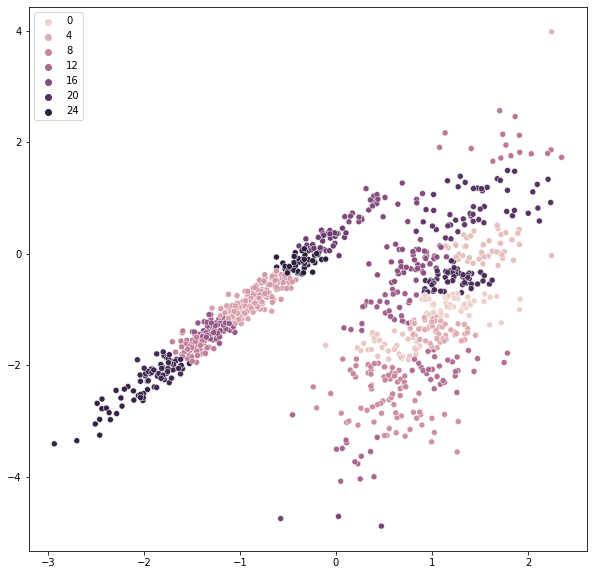

In [14]:
model = cluster.AffinityPropagation(damping=0.9)
model.fit(X)
yhat = model.predict(X)

clusters = np.unique(yhat)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

Terrible in this case.

### Agglomerative Clustering

In [42]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

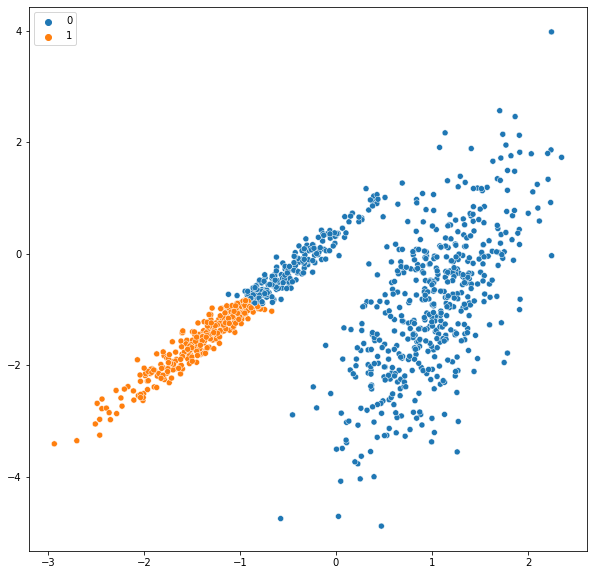

In [47]:
model = cluster.AgglomerativeClustering(n_clusters=2)

yhat = model.fit_predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

In [50]:
# plot_dendrogram(model, truncate_mode='level', p=2)

In [17]:
# reasonable!

### BIRCH

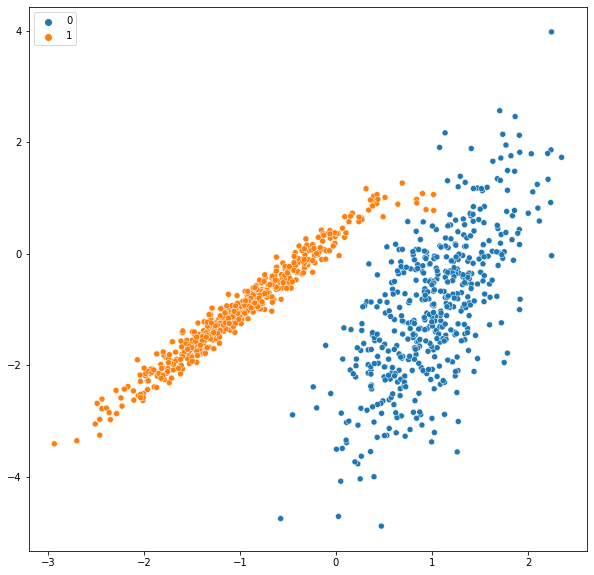

In [18]:
model = cluster.Birch(threshold=0.01, n_clusters=2)
model.fit(X)

yhat = model.predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

In [20]:
# excellent

### DBSCAN

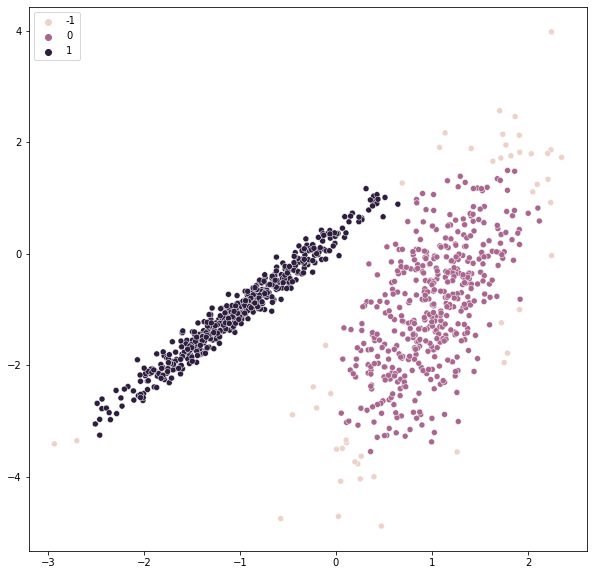

In [22]:
model = cluster.DBSCAN(eps=0.30, min_samples=9)

yhat = model.fit_predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

In [23]:
# pretty good with interesting outliers

### KMeans
Alternative is mini batch kmeans

C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


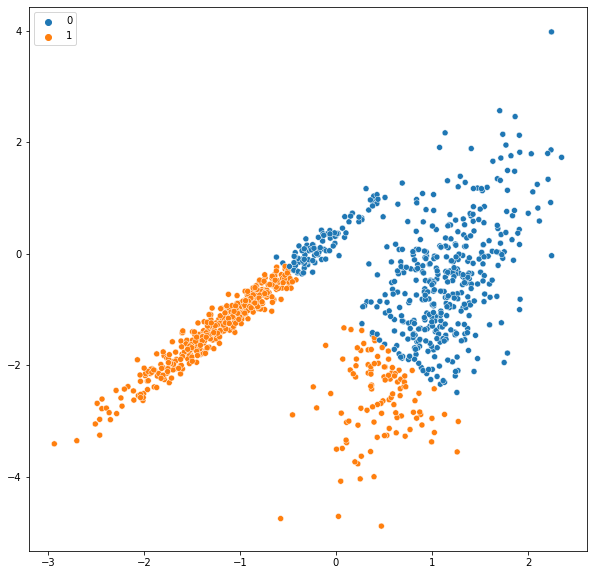

In [24]:
model = cluster.KMeans(n_clusters=2)
model.fit(X)
yhat = model.predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


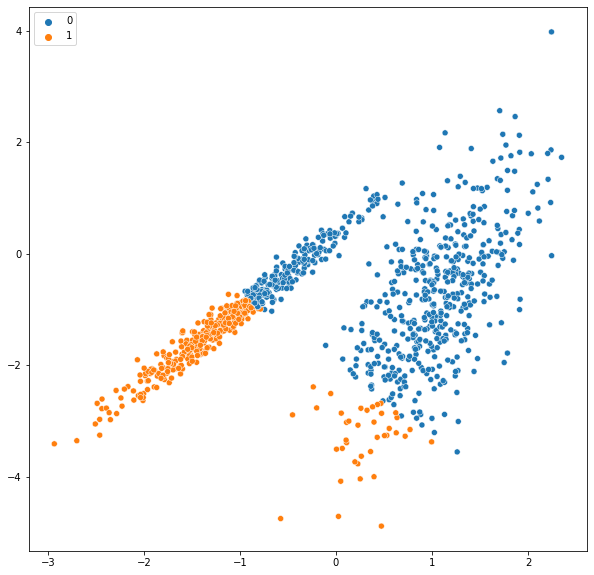

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

model = cluster.KMeans(n_clusters=2)
model.fit(X)
yhat = model.predict(X_scaled)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

### Mean Shift

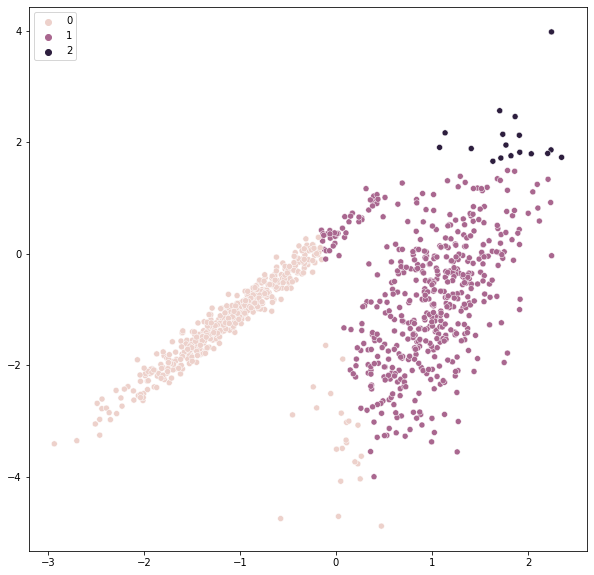

In [25]:
model = cluster.MeanShift()

yhat = model.fit_predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

## OPTICS

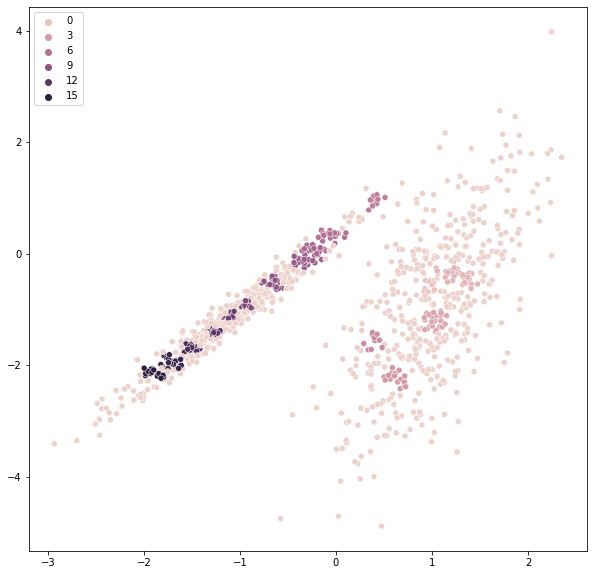

In [31]:
model = cluster.OPTICS(eps=0.8, min_samples=10)
yhat = model.fit_predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

### Spectral Clustering

C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


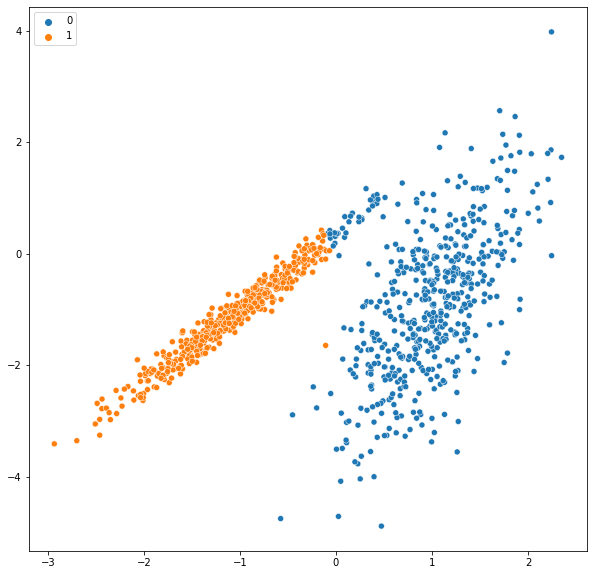

In [32]:
model = cluster.SpectralClustering(n_clusters=2)
yhat = model.fit_predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()

### Gaussian Mixture Model

C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


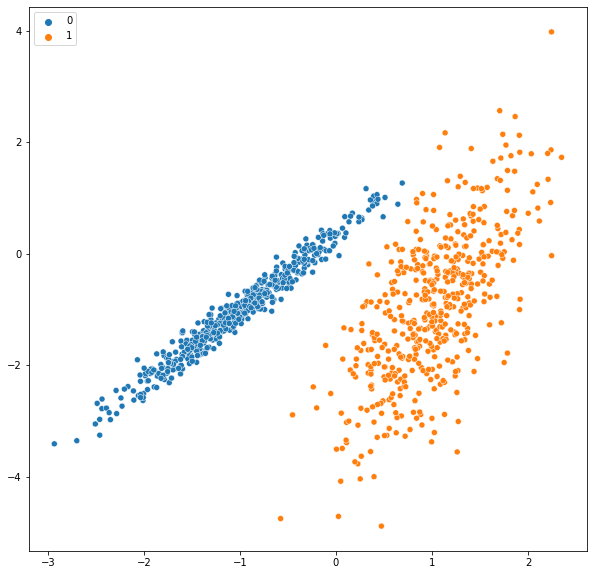

In [33]:
from sklearn import mixture

model = mixture.GaussianMixture(n_components=2)

model.fit(X)
yhat = model.predict(X)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=yhat)
plt.show()